In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno # To visualize missing value
import plotly.graph_objects as go # To Generate Graphs
import plotly.express as px # To Generate box plot for statistical representation
%matplotlib inline

In [4]:
df = pd.read_csv('heart.csv')
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [6]:
df.shape

(303, 14)

In [7]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [8]:
df.info

<bound method DataFrame.info of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1    

In [9]:
df.nunique

<bound method DataFrame.nunique of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1 

In [10]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [11]:
df['sex']=df['sex'].astype('object')
df['cp'] = df['cp'].astype('object')
df['fbs'] = df['fbs'].astype('object')
df['restecg'] = df['restecg'].astype('object')
df['exang'] = df['exang'].astype('object')
df['slope'] = df['slope'].astype('object')
df['ca'] = df['ca'].astype('object')
df['thal'] = df['thal'].astype('object')
df.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
target        int64
dtype: object

In [12]:
df['ca'].unique()

array([0, 2, 1, 3, 4], dtype=object)

In [13]:
df.ca.value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

In [14]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [16]:
df['target'] = df.target.replace({1: "Disease", 0: "No_disease"})
df['sex'] = df.sex.replace({1: "Male", 0: "Female"})
df['cp'] = df.cp.replace({1: "typical_angina", 
                          2: "atypical_angina", 
                          3:"non-anginal pain",
                          4: "asymtomatic"})
df['exang'] = df.exang.replace({1: "Yes", 0: "No"})
df['slope'] = df.cp.replace({1: "upsloping", 
                          2: "flat", 
                          3:"downsloping"})
df['thal'] = df.thal.replace({1: "fixed_defect", 2: "reversable_defect", 3:"normal"})

In [17]:
df.describe()

,age,trestbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


In [18]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Disease       165
No_disease    138
Name: target, dtype: int64


Text(0.5, 1.0, 'Heart Disease Classes')

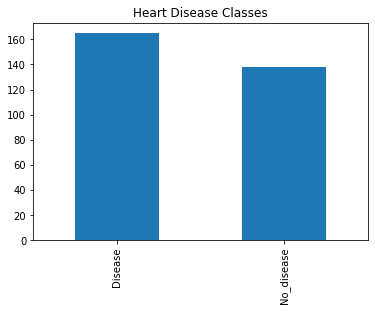

In [19]:
print(df.target.value_counts())
df['target'].value_counts().plot(kind="bar").set_title("Heart Disease Classes")

Text(0.5, 1.0, 'Age Distribution')

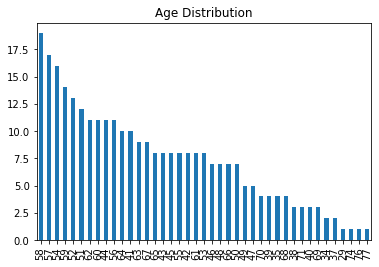

In [20]:
df['age'].value_counts().plot(kind="bar").set_title('Age Distribution')

58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
Name: age, dtype: int64


Text(0, 0.5, 'Age distribution')

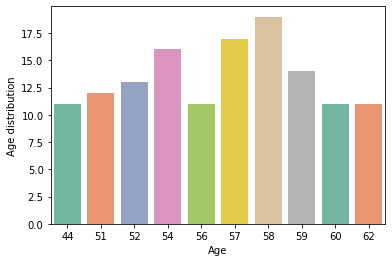

In [21]:
print(df.age.value_counts()[:10])
sns.barplot(x=df.age.value_counts()[:10].index,
            y=df.age.value_counts()[:10].values,
            palette='Set2')
plt.xlabel('Age')
plt.ylabel('Age distribution')

In [22]:
print(min(df.age))
print(max(df.age))
print(df.age.mean())

29
77
54.366336633663366


Male      207
Female     96
Name: sex, dtype: int64


Text(0.5, 1.0, 'Sex Distribution')

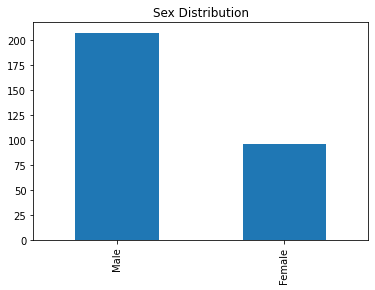

In [23]:
print(df.sex.value_counts())
df['sex'].value_counts().plot(kind='bar').set_title("Sex Distribution")

0                   143
atypical_angina      87
typical_angina       50
non-anginal pain     23
Name: cp, dtype: int64


Text(0.5, 1.0, 'chest pain distribution')

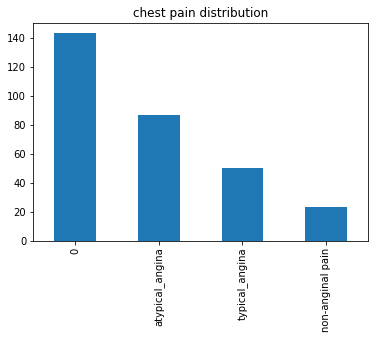

In [24]:
print(df.cp.value_counts())
df['cp'].value_counts().plot(kind="bar").set_title("chest pain distribution")

1    152
0    147
2      4
Name: restecg, dtype: int64


Text(0.5, 1.0, 'resting ecg distribution')

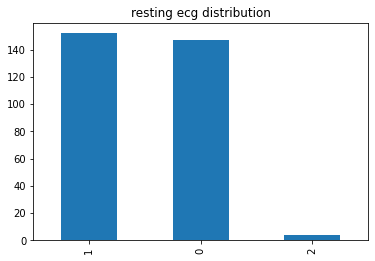

In [25]:
print(df.restecg.value_counts())
df['restecg'].value_counts().plot(kind='bar').set_title("resting ecg distribution")

No     204
Yes     99
Name: exang, dtype: int64


Text(0.5, 1.0, 'exercise induced agina distribution')

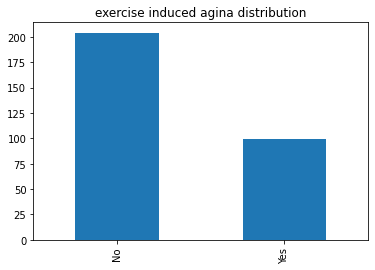

In [28]:
print(df.exang.value_counts())
df['exang'].value_counts().plot(kind='bar').set_title("exercise induced agina distribution")

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64


Text(0.5, 1.0, 'number of major vessel Distribution')

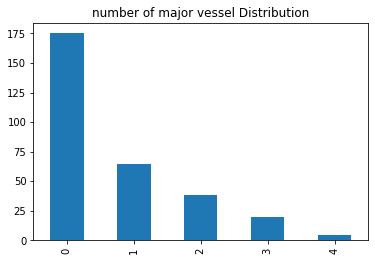

In [29]:
print(df.ca.value_counts())
df['ca'].value_counts().plot(kind="bar").set_title("number of major vessel Distribution")

reversable_defect    166
normal               117
fixed_defect          18
0                      2
Name: thal, dtype: int64


Text(0.5, 1.0, 'Thal Distributon')

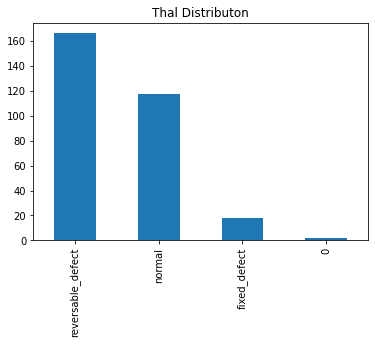

In [30]:
print(df.thal.value_counts())
df['thal'].value_counts().plot(kind="bar").set_title("Thal Distributon")


# Visualize Categorical data distribution

Text(0.5, 1.0, 'Disease classes according to Sex')

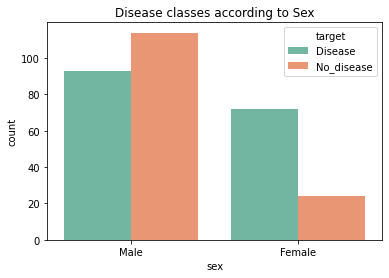

In [35]:
sns.countplot(x='sex', hue='target', data=df, palette='Set2').set_title('Disease classes according to Sex')

Text(0.5, 1.0, 'Disease classes according to Chest Pain')

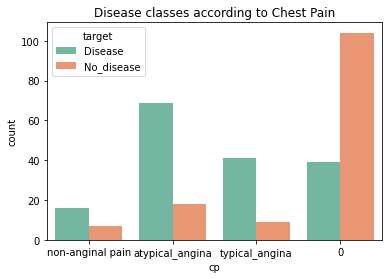

In [36]:
sns.countplot(x='cp', hue='target', data=df, palette='Set2').set_title('Disease classes according to Chest Pain')

Text(0.5, 1.0, 'Disease classes according to thal')

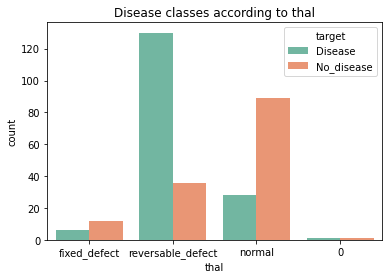

In [37]:
sns.countplot(x='thal', hue='target', data=df, palette='Set2').set_title('Disease classes according to thal')

Text(0.5, 1.0, 'Disease classes according to Exercise Induced Angina')

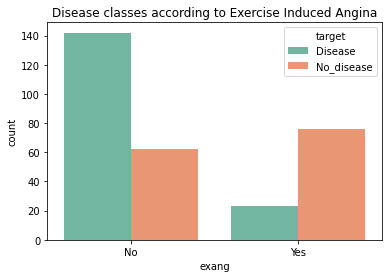

In [38]:
sns.countplot(x='exang', hue='target', data=df, palette='Set2').set_title('Disease classes according to Exercise Induced Angina')

Text(0.5, 1.0, 'Disease classes according to fbs')

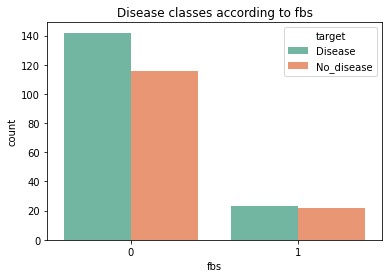

In [39]:


sns.countplot(x='fbs', hue='target', data=df, palette='Set2').set_title('Disease classes according to fbs')

Text(0.5, 1.0, 'Disease classes according to Num Major Vessel')

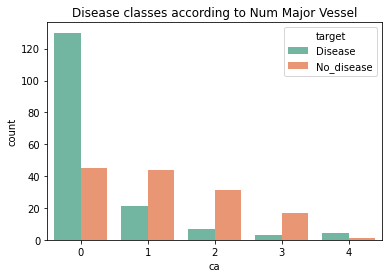

In [40]:
sns.countplot(x='ca', hue='target', data=df, palette='Set2').set_title('Disease classes according to Num Major Vessel')

# Visualizing all together

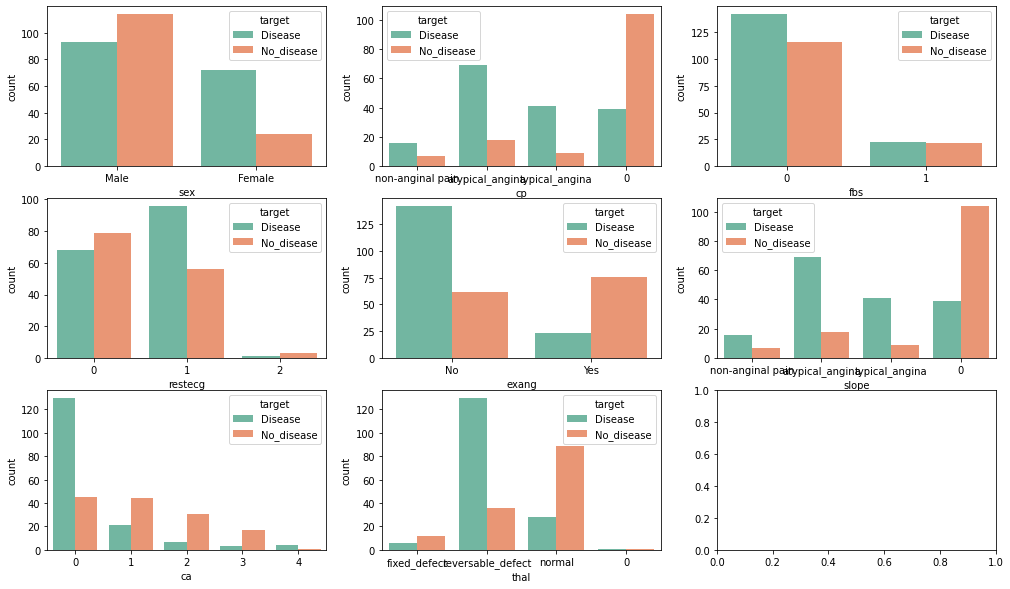

In [41]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(17,10))
cat_feat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

for idx, feature in enumerate(cat_feat):
    ax = axes[int(idx/3), idx%3]
    if feature != 'target':
        sns.countplot(x=feature, hue='target', data=df, ax=ax, palette='Set2')

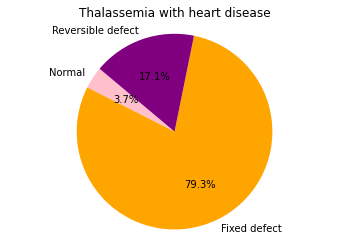

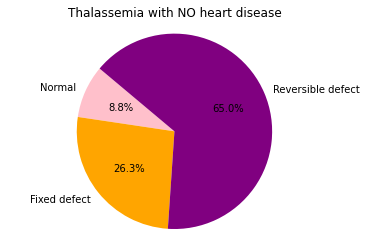

In [42]:
labels= 'Normal', 'Fixed defect', 'Reversible defect'
sizes=[6, 130, 28]
colors=['pink', 'orange', 'purple']
plt.pie(sizes, labels=labels, colors=colors, autopct='%.1f%%', startangle=140)
plt.axis('equal')
plt.title('Thalassemia with heart disease')
plt.show()

# Not having heart disease
labels= 'Normal', 'Fixed defect', 'Reversible defect'
sizes=[12, 36, 89]
colors=['pink', 'orange', 'purple']
plt.pie(sizes, labels=labels, colors=colors, autopct='%.1f%%', startangle=140)
plt.axis('equal')
plt.title('Thalassemia with NO heart disease')
plt.show()

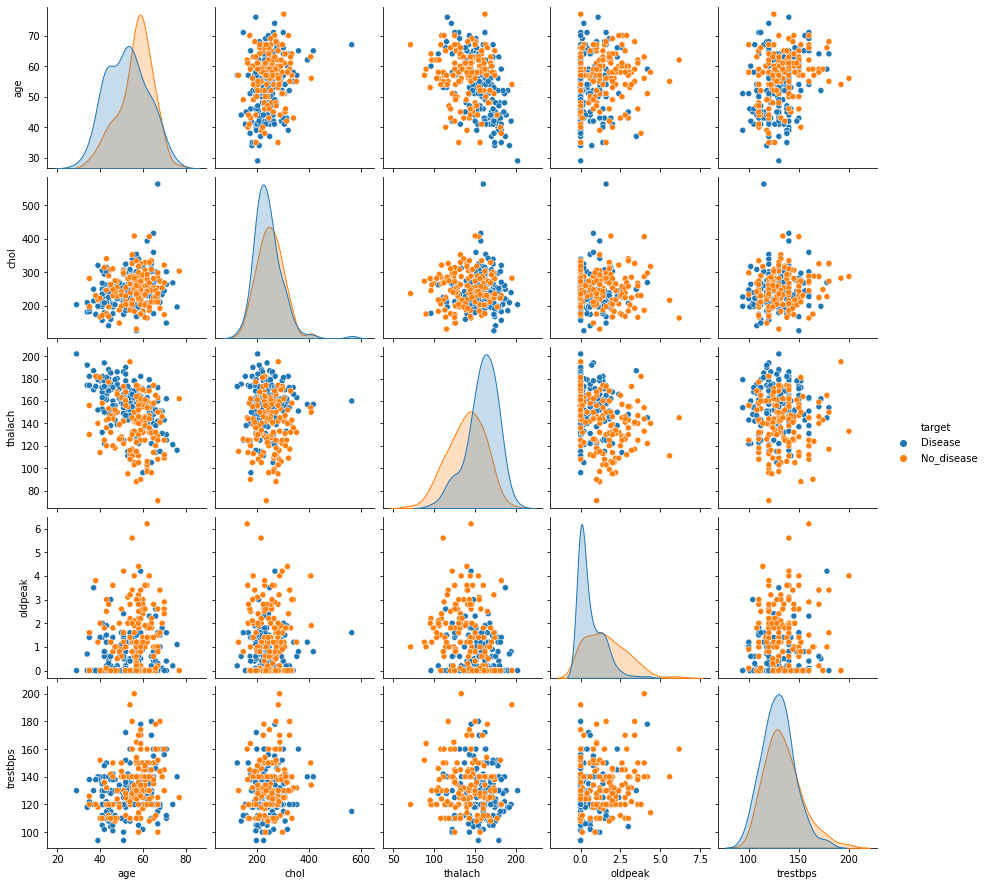

In [43]:
continous_features = ['age', 'chol', 'thalach', 'oldpeak','trestbps']  
sns.pairplot(df[continous_features + ['target']], hue='target')

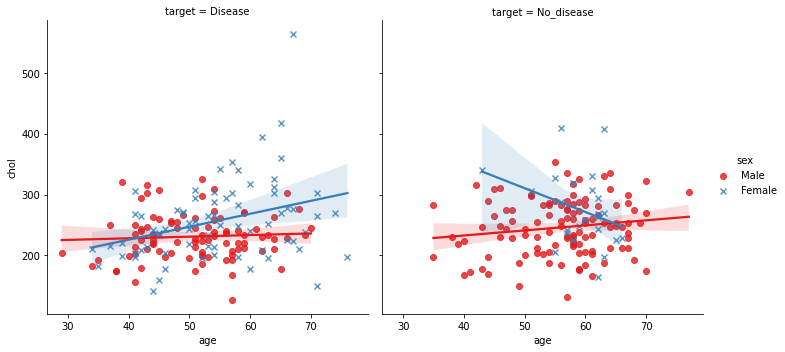

In [44]:
sns.lmplot(x="age", y="chol", hue="sex", col="target",
           markers=["o", "x"],
           palette="Set1",
           data=df)
plt.show()

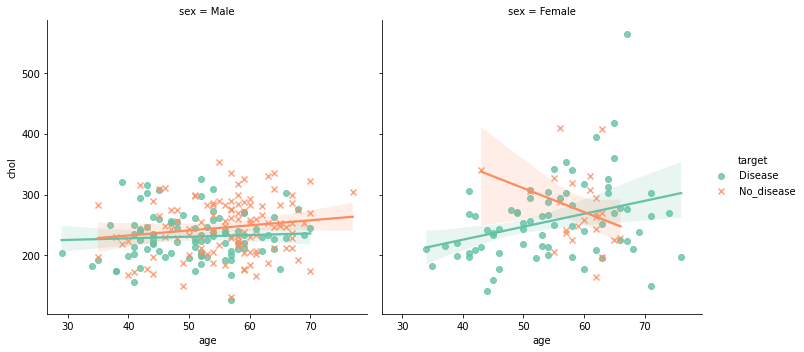

In [45]:
# to understand the relationship between age and chol in each of the sex, based on target.
sns.lmplot(x="age", 
           y="chol", 
           hue="target", 
           col="sex",
          #  row="target",
          #  order=2, 
           markers=["o", "x"],
           palette="Set2",
           data=df)
plt.show()

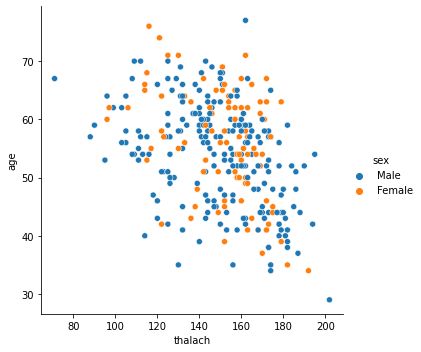

In [46]:
# relation plot relplot
sns.relplot(x='thalach', y = 'age', hue='sex', data=df )

/tmp/ipykernel_4895/2831669817.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df.corr(), dtype=np.bool)


(5.5, -0.5)

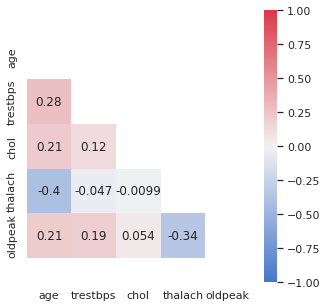

In [47]:
# Correlation with Heatmap Visualization 
sns.set(style="white") 
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(5,5))
cmap = sns.diverging_palette(255, 10, as_cmap=True)
sns.heatmap(df.corr(), mask=mask, annot=True, square=True, cmap=cmap,vmin=-1, vmax=1, ax=ax)  

bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)

In [48]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title="Heart Disease EDA", html={'style':{'full_width':True}})